In [95]:
from google.colab import drive
import pandas as pd

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [96]:
google_comment_df  = pd.read_csv("/content/google_饗食天堂_台北京站店_comment.csv")
google_comment_df2 = pd.read_csv("/content/google_饗食天堂_台北信義店_comment.csv")
google_comment_df3 = pd.read_csv("/content/google_饗食天堂_台北大直店_comment.csv")
google_comment_df4 = pd.read_csv("/content/google_饗食天堂_新北板橋店_comment.csv")
google_comment_df5 = pd.read_csv("/content/google_饗食天堂_桃園中壢店_comment.csv")
google_comment_df6 = pd.read_csv("/content/google_饗食天堂_桃園新光店_comment.csv")

In [97]:
google_comment_df

,評論者,評等,評語
0,YC H,5,只能說 好好吃
1,raymond au,5,地方很大，食物選擇很多， 價錢不貴 ，味道也不錯！
2,王曉梅,5,骰子牛天使紅蝦讚，各種菜色都好吃。
3,邱厚諭,4,東西豐富 口味適中 適合帶家人或者商業聚餐都合適
4,Tony Tsai,5,提供的餐飲依然是在水準之上！
...,...,...,...
1298,HUNG YI LEE,4,可以放鬆用餐
1299,陳則銘,4,菜色很多很好吃 但價格稍貴 偶而去一次尚可
1300,黃韓霓,5,很好吃，東西又多了，其實這樣算算很便宜
1301,戰乙女瓦爾基莉,4,"吃的東西五花八門,但價格稍貴,雖是如此還是有許多人去吃,算是有吸引到年輕人嗎？"


In [98]:
def convertScore(score): 
     if score >= 4:
        return 'good'
     else:
        return 'bad'


def Convert(google):
     google['status'] = google['評等'].map(lambda e : convertScore(e))
     google = google[google['status'].isin(['good', 'bad'])]
     google['status'] = google['status'].replace({'good':1, 'bad': 0})
     google = google.drop(columns = ['評等','評論者'])
     return google


google_comment_df = Convert(google_comment_df)
google_comment_df2 = Convert(google_comment_df2)
google_comment_df3 = Convert(google_comment_df3)
google_comment_df4 = Convert(google_comment_df4)
google_comment_df5 = Convert(google_comment_df5)
google_comment_df6 = Convert(google_comment_df6)


#接著我們把所有dataframe整合成一個google dataframe

google_comment_df


,評語,status
0,只能說 好好吃,1
1,地方很大，食物選擇很多， 價錢不貴 ，味道也不錯！,1
2,骰子牛天使紅蝦讚，各種菜色都好吃。,1
3,東西豐富 口味適中 適合帶家人或者商業聚餐都合適,1
4,提供的餐飲依然是在水準之上！,1
...,...,...
1298,可以放鬆用餐,1
1299,菜色很多很好吃 但價格稍貴 偶而去一次尚可,1
1300,很好吃，東西又多了，其實這樣算算很便宜,1
1301,"吃的東西五花八門,但價格稍貴,雖是如此還是有許多人去吃,算是有吸引到年輕人嗎？",1


In [99]:
google = pd.concat([google_comment_df,google_comment_df2,google_comment_df3,google_comment_df4,google_comment_df5,google_comment_df6],ignore_index=True)

In [100]:
bad_df = google[google['status'] ==0]
bad_df.shape

(1836, 2)

In [101]:
good_df = google[   google['status'] ==1]
good_df = good_df.sample(n=1025)

In [102]:
google

,評語,status
0,只能說 好好吃,1
1,地方很大，食物選擇很多， 價錢不貴 ，味道也不錯！,1
2,骰子牛天使紅蝦讚，各種菜色都好吃。,1
3,東西豐富 口味適中 適合帶家人或者商業聚餐都合適,1
4,提供的餐飲依然是在水準之上！,1
...,...,...
7411,(由 Google 提供翻譯) 好吃～(原始評論)好吃～,1
7412,從迎賓到送客 服務親切,1
7413,有好吃的也有普通的但沒有不好吃的，品質算高，價格也合理；有幾樣菜非常值得推薦。沒有遇到巔峰所...,1
7414,若想吃到飽，在桃園應該選這間是不二之選了。,1


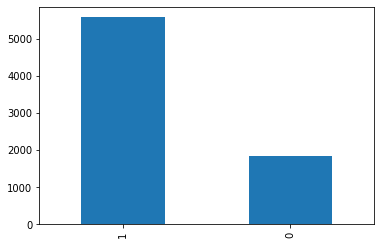

In [103]:
google['status'].value_counts().plot(kind='bar')

In [104]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(google, test_size = 0.2, random_state = 927)
train_df = pd.DataFrame(train_df)


In [105]:
!pip install -U ipykernel
!pip install modin[dask]

Requirement already up-to-date: ipykernel in /usr/local/lib/python3.6/dist-packages (5.3.4)


In [106]:
pip install simpletransformers==0.48.15

In [107]:
from simpletransformers.classification import ClassificationModel
!pip install wandb
model = ClassificationModel('bert', 'hfl/chinese-bert-wwm')
model.train_model(train_df, args = {'/content/wan': True})

Some weights of the model checkpoint at hfl/chinese-bert-wwm were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint

ValueError: ignored

In [ ]:
result, model_output, wrong_predictions = model.eval_model(test_df)
result